In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree


df = pd.read_csv("heart.csv")

In [2]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [3]:
classifier = DecisionTreeClassifier()
baseline = classifier.fit(x_train, y_train)

prediction = baseline.predict(x_test)
prediction

accuracy_score(y_test, prediction)

0.7472527472527473

In [4]:
def evaluate(clr):
    model = clr.fit(x_train, y_train)
    prediction = model.predict(x_test)
    return accuracy_score(y_test, prediction)

In [5]:
clr1 = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=3)
evaluate(clr1)


0.6813186813186813

In [6]:
clr2 = DecisionTreeClassifier(min_samples_split= 3, max_features= 5)
evaluate(clr2)

0.7142857142857143

In [7]:
parameters = {'criterion':["gini", "entropy"], 'max_depth': [2,3,4,8], 'min_samples_split':[3,4,10,20]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters,scoring='accuracy')
grid_search.fit(x_train, y_train)
score = pd.DataFrame(grid_search.cv_results_)


best_clr = grid_search.best_estimator_
evaluate(best_clr)

0.7692307692307693

In [8]:
k = 5
def cvs(cls_1):
    kf = KFold(n_splits = k, random_state = None)
    cross_val_scores = cross_val_score(cls_1,x, y, scoring = 'accuracy', cv=kf)
    print(cross_val_scores)
    print("avg_acc: {}".format(cross_val_scores.mean()))

In [9]:
cvs(best_clr)


[0.83606557 0.70491803 0.75409836 0.71666667 0.66666667]
avg_acc: 0.7356830601092896


In [10]:
k1 = 5
kff = KFold(n_splits=k1, shuffle=True, random_state=42)
acc_score = []
models = []
for train_index, test_index in kff.split(x):
   X_train, X_test = x[train_index,: ], x[test_index,: ]
   Y_train, Y_test = y[train_index], y[test_index]
   model = best_clr.fit(X_train, Y_train)
   pred_values = model.predict(X_test)
   models.append(model)
   acc = accuracy_score(pred_values, Y_test)
   acc_score.append(acc)

avg_acc_score = sum(acc_score) / k1

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.819672131147541, 0.8032786885245902, 0.7540983606557377, 0.7833333333333333, 0.8333333333333334]
Avg accuracy : 0.7987431693989071


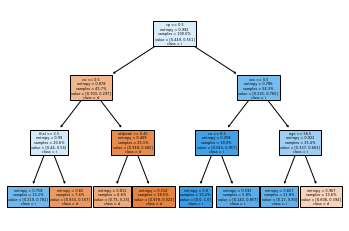

In [11]:
target = "disease"
features = df.drop(columns=target).columns

_ = tree.plot_tree(models[0], feature_names=features, class_names=target, filled=True, proportion= True)